# Analisis Faktor Performa Pelajar dan Model Prediksi Nilai Ujian

### Disusun oleh:
__Rasendra Akbar Satyatama__ (5003221120)<br>
S1 - __Statistika__<br>
Institut Teknologi Sepuluh Nopember<br>
Surabaya<br>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I. Permasalahan:
- Apa saja faktor-faktor yang mempengaruhi performa pelajar?
- Bagaimana hubungan antara faktor-faktor tersebut dengan nilai ujian?
- Bagaimana prediksi nilai ujian berdasarkan faktor-faktor tersebut?

## II. Data & Identifikasi Variabel

Sumber data: _https://www.kaggle.com/datasets/lainguyn123/student-performance-factors_

In [133]:
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


__Hours_Studied:__ Jumlah jam belajar per minggu.<br>
__Attendance:__ Persentase kehadiran di kelas.<br>
__Parental_Involvement:__ Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi).<br>
__Access_to_Resources:__ Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).<br>
__Extracurricular_Activities:__ Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).<br>
__Sleep_Hours:__ Rata-rata jam tidur per malam.<br>
__Previous_Scores:__ Nilai ujian sebelumnya.<br>
__Motivation_Level:__ Tingkat motivasi siswa (Rendah, Sedang, Tinggi).<br>
__Internet_Access:__ Ketersediaan akses internet (Ya, Tidak).<br>
__Tutoring_Sessions:__ Jumlah sesi bimbingan belajar per bulan.<br>
__Family_Income:__ Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).<br>
__Teacher_Quality:__ Kualitas guru (Rendah, Sedang, Tinggi).<br>
__School_Type:__ Jenis sekolah yang dihadiri (Negeri, Swasta).<br>
__Peer_Influence:__ Pengaruh teman terhadap prestasi akademik (Positif, Netral, Negatif).<br>
__Physical_Activity:__ Rata-rata jam aktivitas fisik per minggu.<br>
__Learning_Disabilities:__ Ada atau tidaknya gangguan belajar (Ya, Tidak).<br>
__Parental_Education_Level:__ Tingkat pendidikan tertinggi dari orang tua (SMA, Perguruan Tinggi, Pascasarjana).<br>
__Distance_from_Home:__ Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).<br>
__Gender:__ Jenis kelamin siswa (Laki-laki, Perempuan).<br>
__Exam_Score:__ Nilai akhir ujian.

## III. Data Preprocessing

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [135]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [136]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### Identifikasi Outliers untuk Variabel Numerik

In [137]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Hitung IQR
    IQR = Q3 - Q1
    
    # Batas bawah dan batas atas untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mendapatkan data yang merupakan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return len(outliers)

variables = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores']

# Iterasi ke setiap variabel dan hitung jumlah outlier
for var in variables:
    num_outliers = detect_outliers_iqr(data, var)
    print(f'Jumlah outlier pada {var}: {num_outliers}')


Jumlah outlier pada Hours_Studied: 40
Jumlah outlier pada Attendance: 0
Jumlah outlier pada Sleep_Hours: 0
Jumlah outlier pada Previous_Scores: 0


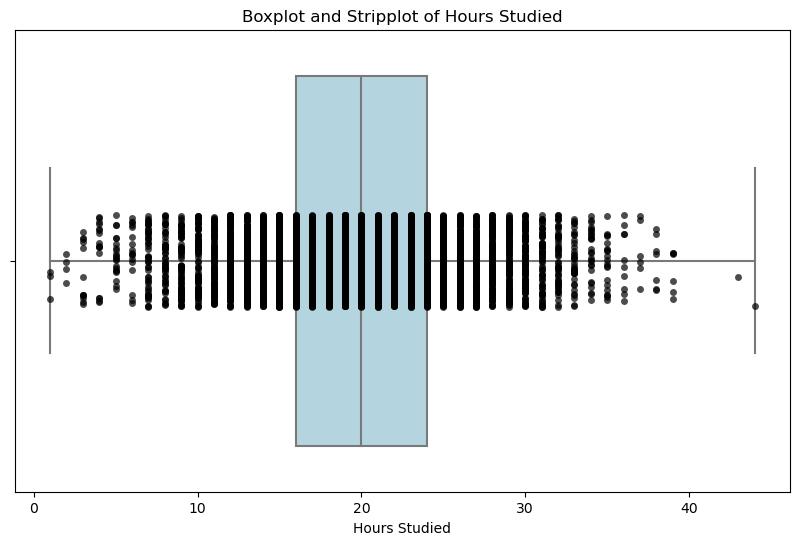

In [138]:
plt.figure(figsize=(10, 6))

# Membuat boxplot dan stripplot
sns.boxplot(x=data['Hours_Studied'], color='lightblue', whis=np.inf, fliersize=10)
sns.stripplot(x=data['Hours_Studied'], color='black', alpha=0.7, jitter=True)

plt.xlabel('Hours Studied')
plt.title('Boxplot and Stripplot of Hours Studied')

plt.show()

Titik-titik ini masih dalam rentang yang dianggap normal, tetapi mendekati batas minimum dan juga maksimum dari distribusi data. Ini bisa menunjukkan bahwa nilai-nilai ini cukup rendah/tinggi dibandingkan dengan mayoritas data, atau ada variasi yang signifikan di bagian bawah distribusi. Sehingga tidak perlu mengganti/menghapus data outliers pada variabel Hours_Studied karena dalam kasus jam belajar, data bisa sangat bervariasi

## IV. Analisis Eksploratif

__Permasalahan__<br>
- Apakah pelajar yang motivasinya rendah memiliki nilai ujian yang lebih rendah dibandingkan dengan pelajar yang motivasinya tinggi?

- Bagaimana keterlibatan orang tua mempengaruhi nilai ujian pelajar? Apakah keterlibatan tinggi berhubungan dengan nilai ujian yang lebih baik?

- Apakah siswa yang memiliki akses ke sumber daya pendidikan yang lebih baik memiliki nilai ujian yang lebih tinggi?

- Apakah partisipasi dalam kegiatan ekstrakurikuler berhubungan dengan nilai ujian yang lebih tinggi atau lebih rendah?

- Bagaimana rata-rata jam tidur mempengaruhi nilai ujian pelajar?

- Apakah ada hubungan antara kualitas guru dan nilai ujian pelajar?

- Apakah pengaruh teman (positif, netral, negatif) berhubungan dengan nilai ujian pelajar?

- Apakah kehadiran mempengaruhi nilai ujian pelajar?

- Apakah jam belajar mempengaruhi nilai ujian pelajar?

- Apakah nilai ujian sebelumnya mempengaruhi nilai ujian pelajar saat ini?

- Apakah tingkat pendapatan keluarga atau tingkat pendidikan orang tua berhubungan dengan nilai ujian pelajar?

- Apakah pelajar dengan akses internet memiliki nilai ujian yang lebih tinggi?

#### Apakah pelajar yang motivasinya rendah memiliki nilai ujian yang lebih rendah dibandingkan dengan pelajar yang motivasinya tinggi?

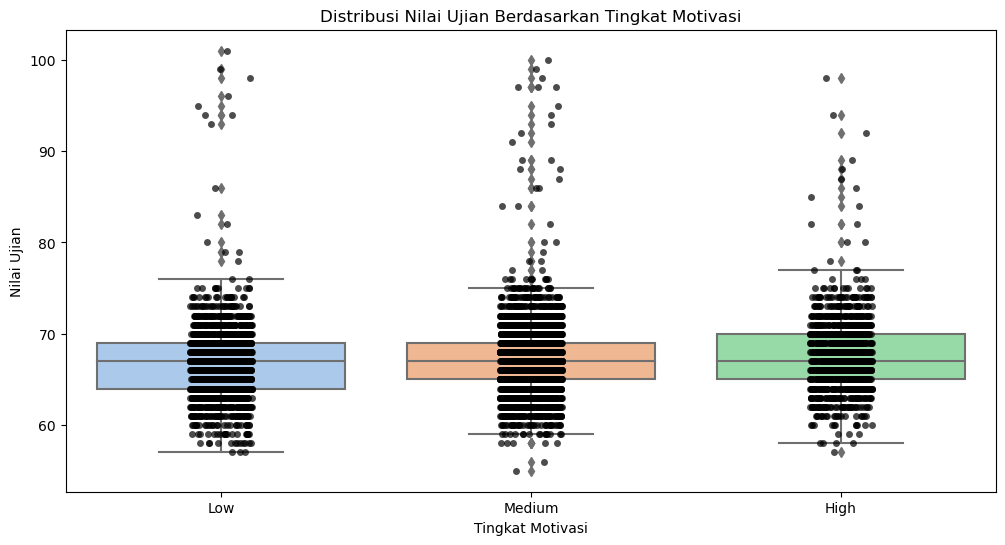

In [139]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Motivation_Level', y='Exam_Score', data=data, palette='pastel')

sns.stripplot(x='Motivation_Level', y='Exam_Score', data=data, color='black', alpha=0.7, jitter=True)

plt.title('Distribusi Nilai Ujian Berdasarkan Tingkat Motivasi')
plt.xlabel('Tingkat Motivasi')
plt.ylabel('Nilai Ujian')
plt.show()

Kategori motivasi tinggi cenderung memiliki nilai ujian yang lebih tinggi dibandingkan dengan kategori motivasi rendah, terlihat dari perbedaan dalam posisi median dan rentang interquartile range antara kategori.

#### Bagaimana keterlibatan orang tua mempengaruhi nilai ujian pelajar? Apakah keterlibatan tinggi berhubungan dengan nilai ujian yang lebih baik?

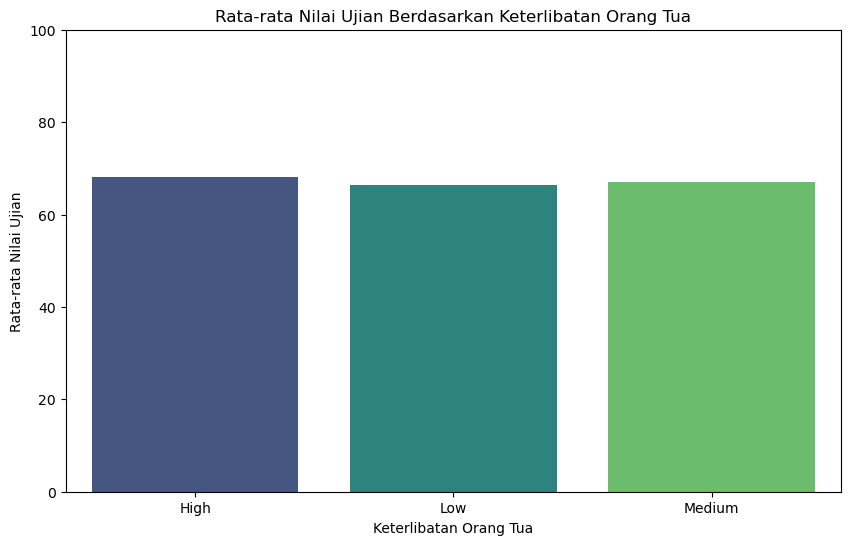

In [140]:
average_scores1 = data.groupby('Parental_Involvement')['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar chart
sns.barplot(x='Parental_Involvement', y='Exam_Score', data=average_scores1, palette='viridis')
plt.ylim(0, 100)
plt.title('Rata-rata Nilai Ujian Berdasarkan Keterlibatan Orang Tua')
plt.xlabel('Keterlibatan Orang Tua')
plt.ylabel('Rata-rata Nilai Ujian')
plt.show()

In [141]:
print("Rata-rata Nilai Ujian Berdasarkan Keterlibatan Orang Tua:")
print(average_scores1)

Rata-rata Nilai Ujian Berdasarkan Keterlibatan Orang Tua:
  Parental_Involvement  Exam_Score
0                 High   68.112200
1                  Low   66.378776
2               Medium   67.113196


Berdasarkan bar chart tersebut, terlihat bahwa keterlibatan orang tua yang tinggi dapat mencapai nilai ujian tertinggi dari kategori lainnya.

#### Apakah siswa yang memiliki akses ke sumber daya pendidikan yang lebih baik memiliki nilai ujian yang lebih tinggi?

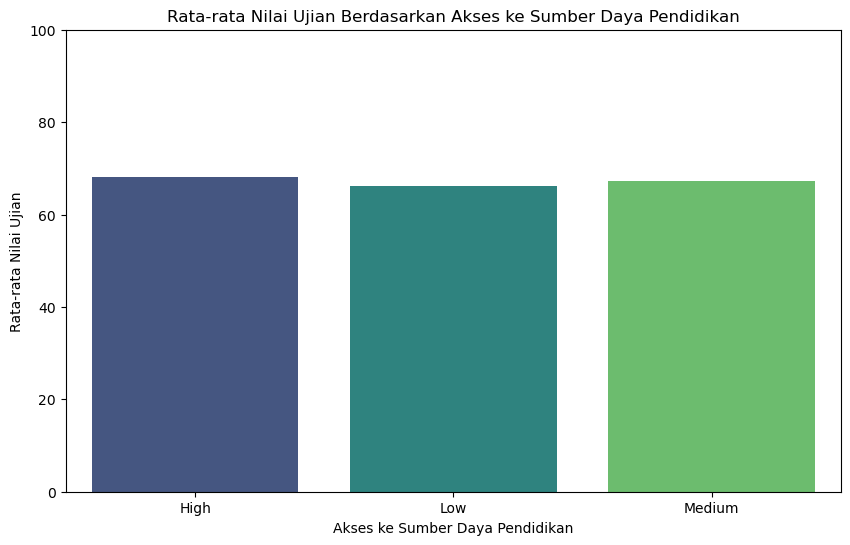

In [142]:
average_scores2 = data.groupby('Access_to_Resources')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))

# Membuat bar chart
sns.barplot(x='Access_to_Resources', y='Exam_Score', data=average_scores2, palette='viridis')

# Menetapkan batas sumbu y hingga 100
plt.ylim(0, 100)

plt.title('Rata-rata Nilai Ujian Berdasarkan Akses ke Sumber Daya Pendidikan')
plt.xlabel('Akses ke Sumber Daya Pendidikan')
plt.ylabel('Rata-rata Nilai Ujian')
plt.show()

In [143]:
print("Rata-rata Nilai Ujian Berdasarkan Akses ke Sumber Daya Pendidikan:")
print(average_scores2)

Rata-rata Nilai Ujian Berdasarkan Akses ke Sumber Daya Pendidikan:
  Access_to_Resources  Exam_Score
0                High   68.103158
1                 Low   66.223705
2              Medium   67.156367


Berdasarkan bar chart tersebut, terlihat bahwa akses sumber daya pendidikan yang baik dapat mencapai nilai ujian tertinggi dari kategori lainnya.

#### Apakah partisipasi dalam kegiatan ekstrakurikuler berhubungan dengan nilai ujian yang lebih tinggi atau lebih rendah?

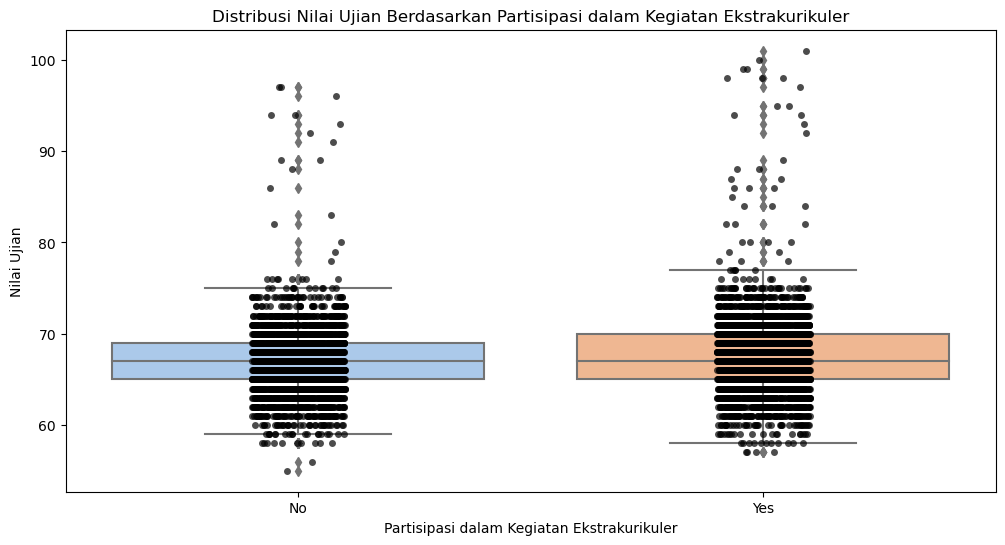

In [144]:
plt.figure(figsize=(12, 6))

# Membuat boxplot untuk distribusi nilai ujian berdasarkan partisipasi ekstrakurikuler
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=data, palette='pastel')

# Menambahkan stripplot untuk menunjukkan titik-titik individu
sns.stripplot(x='Extracurricular_Activities', y='Exam_Score', data=data, color='black', alpha=0.7, jitter=True)

plt.title('Distribusi Nilai Ujian Berdasarkan Partisipasi dalam Kegiatan Ekstrakurikuler')
plt.xlabel('Partisipasi dalam Kegiatan Ekstrakurikuler')
plt.ylabel('Nilai Ujian')
plt.show()

Pelajar yang berpartisipasi dalam kegiatan ekstrakulikuler cenderung memiliki nilai ujian yang lebih tinggi dibandingkan dengan yang tidak mengikuti ekstrakulikuler, terlihat dari perbedaan dalam posisi median dan rentang interquartile range antara kategori dimana yang mengikuti ekstrakulikuler lebih tinggi.

#### Bagaimana rata-rata jam tidur mempengaruhi nilai ujian pelajar?

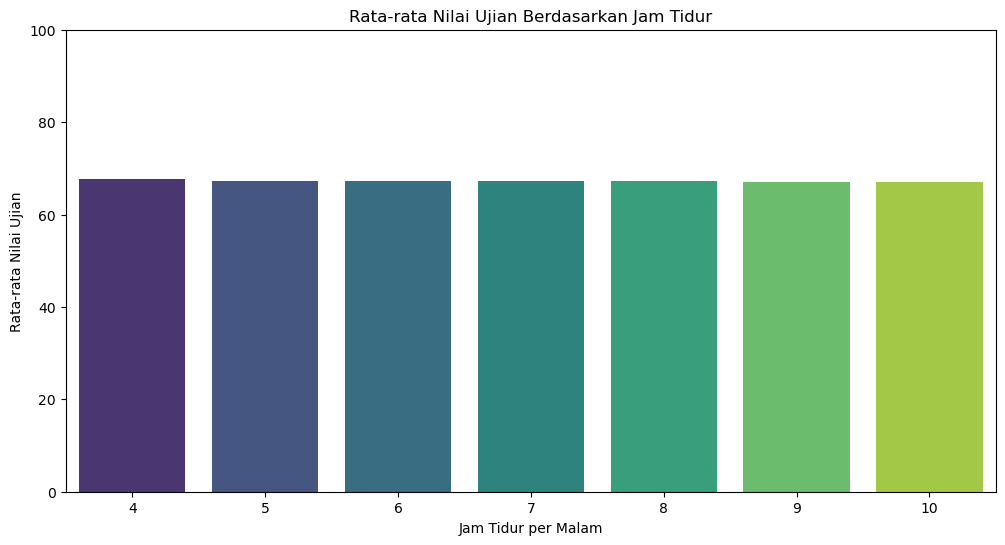

In [145]:
average_scores3 = data.groupby('Sleep_Hours')['Exam_Score'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Membuat bar chart
sns.barplot(x='Sleep_Hours', y='Exam_Score', data=average_scores3, palette='viridis')

plt.title('Rata-rata Nilai Ujian Berdasarkan Jam Tidur')
plt.xlabel('Jam Tidur per Malam')
plt.ylabel('Rata-rata Nilai Ujian')
plt.ylim(0, 100)  # Menetapkan batas sumbu y jika perlu
plt.show()

In [146]:
print("Rata-rata Nilai Ujian Berdasarkan Kualitas Guru:")
print(average_scores3)

Rata-rata Nilai Ujian Berdasarkan Kualitas Guru:
   Sleep_Hours  Exam_Score
0            4   67.692568
1            5   67.261976
2            6   67.216339
3            7   67.263971
4            8   67.262186
5            9   67.140770
6           10   67.122112


Terlihat bahwa jam tidur tiap malam memiliki rata-rata nilai akhir ujian yang hampir sama sehingga tidak terlalu berpengatuh

#### Apakah ada hubungan antara kualitas guru dan nilai ujian pelajar?

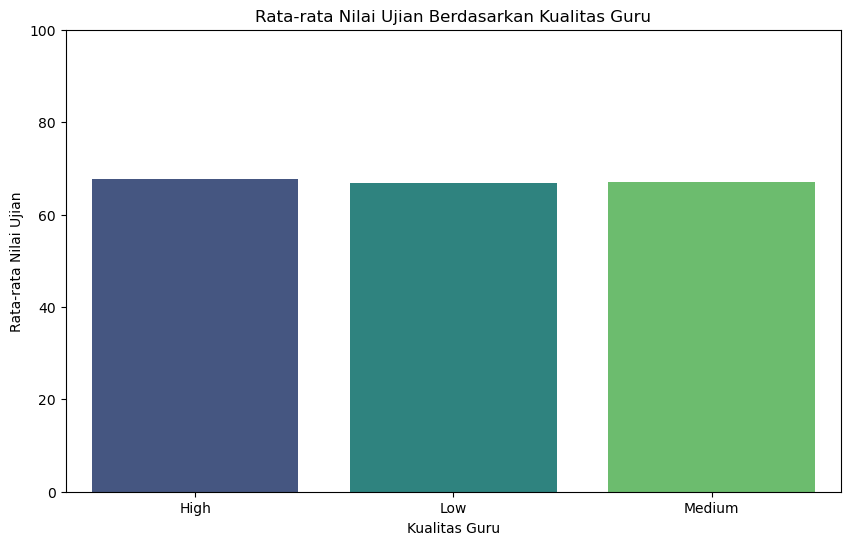

In [147]:
average_scores4 = data.groupby('Teacher_Quality')['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar chart
sns.barplot(x='Teacher_Quality', y='Exam_Score', data=average_scores4, palette='viridis')

# Menetapkan batas sumbu y jika perlu
plt.ylim(0, 100)

plt.title('Rata-rata Nilai Ujian Berdasarkan Kualitas Guru')
plt.xlabel('Kualitas Guru')
plt.ylabel('Rata-rata Nilai Ujian')
plt.show()

In [148]:
print("Rata-rata Nilai Ujian Berdasarkan Kualitas Guru:")
print(average_scores4)

Rata-rata Nilai Ujian Berdasarkan Kualitas Guru:
  Teacher_Quality  Exam_Score
0            High   67.681890
1             Low   66.775889
2          Medium   67.118662


Terlihat bahwa kualitas guru memiliki rata-rata nilai akhir ujian yang hampir sama sehingga tidak terlalu berpengatuh

#### Apakah pengaruh teman (positif, netral, negatif) berhubungan dengan nilai ujian siswa?

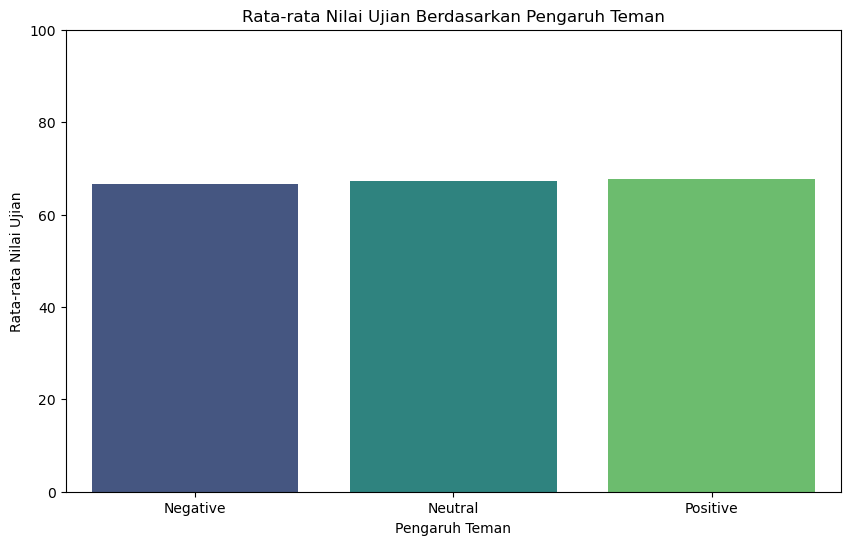

In [149]:
average_scores5 = data.groupby('Peer_Influence')['Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Peer_Influence', y='Exam_Score', data=average_scores5, palette='viridis')

plt.ylim(0, 100)

plt.title('Rata-rata Nilai Ujian Berdasarkan Pengaruh Teman')
plt.xlabel('Pengaruh Teman')
plt.ylabel('Rata-rata Nilai Ujian')
plt.show()

In [150]:
print("Rata-rata Nilai Ujian Berdasarkan Pengaruh Teman:")
print(average_scores5)

Rata-rata Nilai Ujian Berdasarkan Pengaruh Teman:
  Peer_Influence  Exam_Score
0       Negative   66.582707
1        Neutral   67.215631
2       Positive   67.636506


Terlihat bahwa pengaruh teman memiliki rata-rata nilai akhir ujian yang hampir sama sehingga tidak terlalu berpengatuh

#### Apakah kehadiran mempengaruhi nilai ujian pelajar?

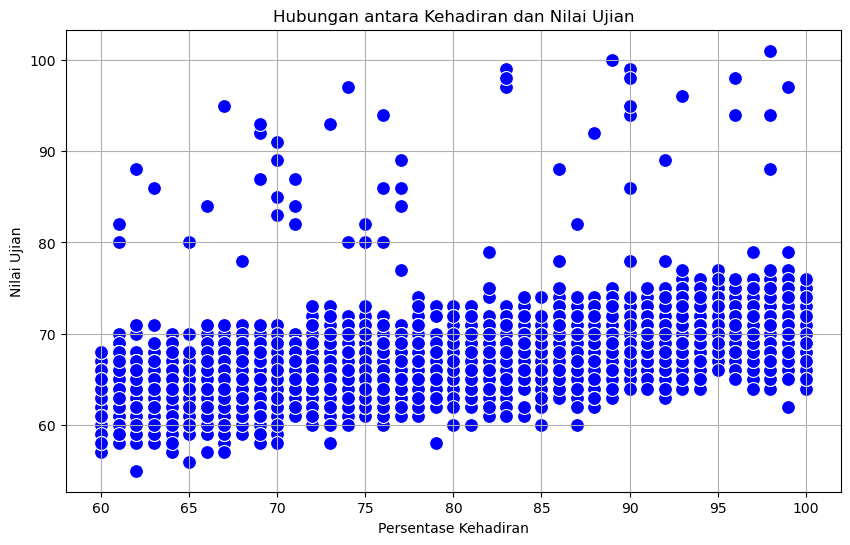

In [151]:
plt.figure(figsize=(10, 6))

# Membuat scatter plot
sns.scatterplot(x='Attendance', y='Exam_Score', data=data, color='blue', s=100)

plt.title('Hubungan antara Kehadiran dan Nilai Ujian')
plt.xlabel('Persentase Kehadiran')
plt.ylabel('Nilai Ujian')
plt.grid(True)
plt.show()

In [152]:
correlation_matrix = np.corrcoef(data['Attendance'], data['Exam_Score'])
corr_coefficient = correlation_matrix[0, 1]

print(f"Korelasi Pearson antara Kehadiran dan Nilai Ujian: {corr_coefficient:}")

Korelasi Pearson antara Kehadiran dan Nilai Ujian: 0.5802585402382594


#### Apakah jam belajar mempengaruhi nilai ujian pelajar?

#### Apakah nilai ujian sebelumnya mempengaruhi nilai ujian pelajar saat ini?

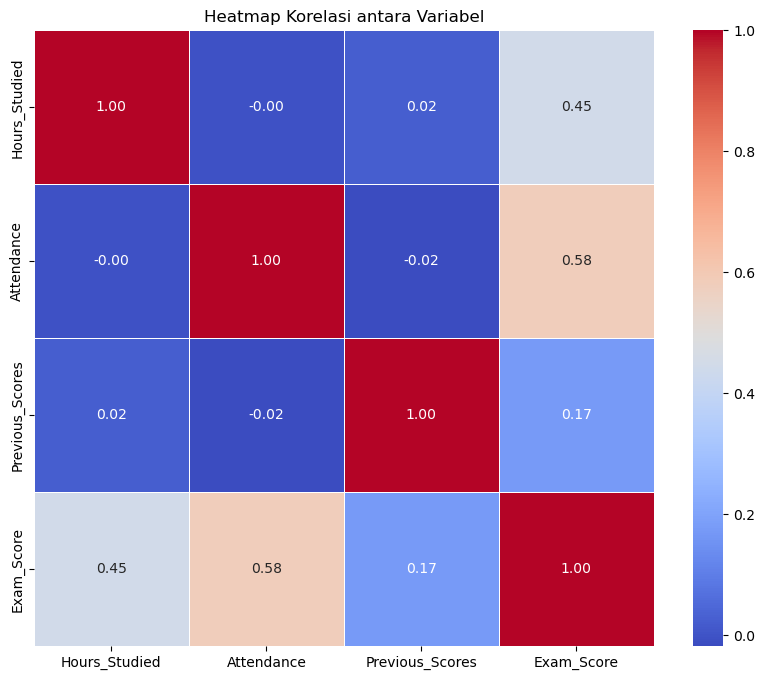

In [153]:
data_corr = data[['Hours_Studied','Attendance','Previous_Scores','Exam_Score']]

correlation_matrix = data_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel')
plt.show()

Nilai korelasi menunjukkan bahwa kehadiran (0,58) memiliki pengaruh positif yang lebih kuat terhadap nilai ujian dibandingkan dengan jam belajar (0,45), yang juga menunjukkan hubungan positif. Sebaliknya, nilai sebelumnya hanya memiliki korelasi rendah (0,17) dengan nilai ujian saat ini, menunjukkan bahwa meskipun ada beberapa hubungan, nilai sebelumnya bukanlah prediktor yang kuat untuk hasil ujian saat ini.

#### Apakah tingkat pendapatan keluarga atau tingkat pendidikan orang tua berhubungan dengan nilai ujian pelajar?

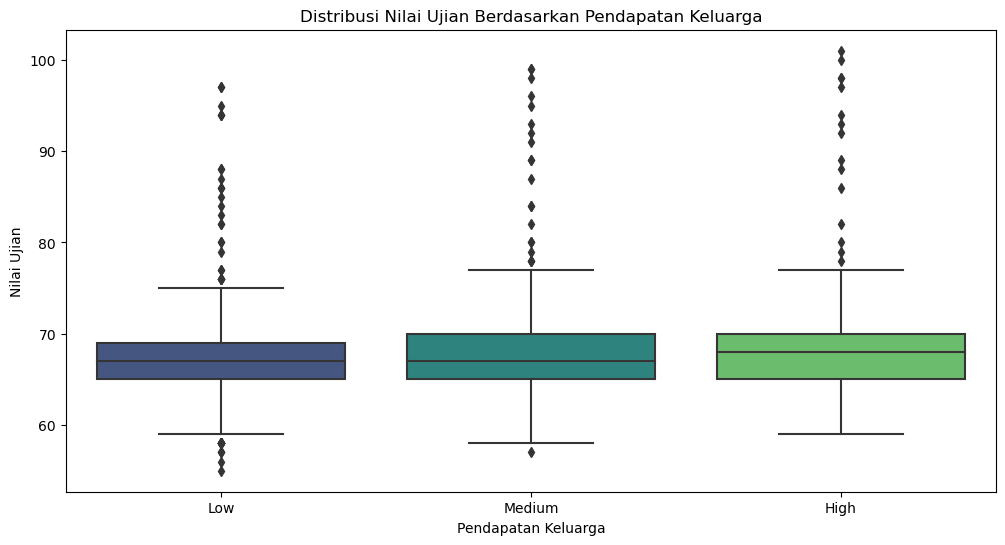

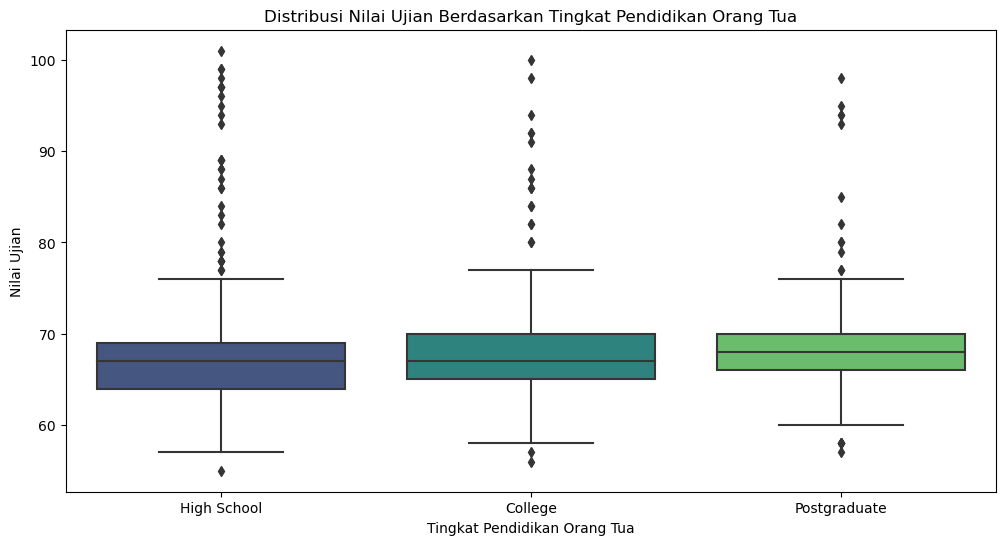

In [154]:
# Box plot untuk Family Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_Income', y='Exam_Score', data=data, palette='viridis')
plt.title('Distribusi Nilai Ujian Berdasarkan Pendapatan Keluarga')
plt.xlabel('Pendapatan Keluarga')
plt.ylabel('Nilai Ujian')
plt.show()

# Box plot untuk Parental Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette='viridis')
plt.title('Distribusi Nilai Ujian Berdasarkan Tingkat Pendidikan Orang Tua')
plt.xlabel('Tingkat Pendidikan Orang Tua')
plt.ylabel('Nilai Ujian')
plt.show()

Terlihat bahwa median pelajar dengan tingkat pendapatan dan pendidikan orang tua yang tinggi dapat mencapai nilai ujian yang tinggi juga

#### Apakah pelajar dengan akses internet memiliki nilai ujian yang lebih tinggi?

In [155]:
average_scores_internet = data.groupby('Internet_Access')['Exam_Score'].mean().reset_index()

print("Rata-rata Nilai Ujian Berdasarkan Akses Internet:")
print(average_scores_internet)

Rata-rata Nilai Ujian Berdasarkan Akses Internet:
  Internet_Access  Exam_Score
0              No   66.554639
1             Yes   67.309520


Pelajar yang memiliki akses internet memiliki rata-rata nilai ujian yang lebih tinggi dibandingkan dengan siswa yang tidak memiliki akses internet

## IV. Model Prediksi

#### 5 a. Memilih variabel-variabel yang relevan terhadap Exam_Score dengan Korelasi Point Biseral

In [156]:
from scipy.stats import pointbiserialr

def point_biserial_correlation(data, categorical_var, numeric_var):
    data[categorical_var] = data[categorical_var].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Menghitung korelasi point-biserial
    corr_coefficient, p_value = pointbiserialr(data[categorical_var], data[numeric_var])
    
    # Menampilkan hasil
    print(f'Korelasi Point-Biserial antara {categorical_var} dan {numeric_var}:')
    print(f'Korelasi: {corr_coefficient:.4f}')
    print(f'p-value: {p_value:.4f}')
    print("\n")

binary_categorical_vars = [
    'Internet_Access', 'Extracurricular_Activities', 'Learning_Disabilities',
]

# Melakukan korelasi point-biserial untuk setiap variabel kategorikal biner
for var in binary_categorical_vars:
    point_biserial_correlation(data, var, 'Exam_Score')


Korelasi Point-Biserial antara Internet_Access dan Exam_Score:
Korelasi: 0.0511
p-value: 0.0000


Korelasi Point-Biserial antara Extracurricular_Activities dan Exam_Score:
Korelasi: 0.0631
p-value: 0.0000


Korelasi Point-Biserial antara Learning_Disabilities dan Exam_Score:
Korelasi: -0.0839
p-value: 0.0000




#### Uji Korelasi Kruskal Wallis untuk Variabel lebih dari 2 kategori

In [157]:
from scipy.stats import kruskal

def kruskal_wallis_test(data, categorical_var, numeric_var):
    # Mengelompokkan data berdasarkan kategori
    groups = [data[data[categorical_var] == category][numeric_var] for category in data[categorical_var].unique()]
    
    # Melakukan uji Kruskal-Wallis
    h_stat, p_value = kruskal(*groups)
    
    # Menampilkan hasil
    print(f'Uji Kruskal-Wallis antara {categorical_var} dan {numeric_var}:')
    print(f'H-Statistic: {h_stat:.4f}')
    print(f'p-value: {p_value:.4f}')
    print("\n")

# Daftar variabel kategorikal dengan lebih dari dua kategori
multi_categorical_vars = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
    'Family_Income', 'Teacher_Quality', 'School_Type', 
    'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home', 'Gender',
    'Tutoring_Sessions','Physical_Activity'
]

# Melakukan uji Kruskal-Wallis untuk setiap variabel kategorikal
for var in multi_categorical_vars:
    kruskal_wallis_test(data, var, 'Exam_Score')


Uji Kruskal-Wallis antara Parental_Involvement dan Exam_Score:
H-Statistic: 186.9347
p-value: 0.0000


Uji Kruskal-Wallis antara Access_to_Resources dan Exam_Score:
H-Statistic: 220.4232
p-value: 0.0000


Uji Kruskal-Wallis antara Motivation_Level dan Exam_Score:
H-Statistic: 57.8502
p-value: 0.0000


Uji Kruskal-Wallis antara Family_Income dan Exam_Score:
H-Statistic: 61.3651
p-value: 0.0000


Uji Kruskal-Wallis antara Teacher_Quality dan Exam_Score:
H-Statistic: 42.0308
p-value: 0.0000


Uji Kruskal-Wallis antara School_Type dan Exam_Score:
H-Statistic: 1.3122
p-value: 0.2520


Uji Kruskal-Wallis antara Peer_Influence dan Exam_Score:
H-Statistic: 81.1170
p-value: 0.0000


Uji Kruskal-Wallis antara Parental_Education_Level dan Exam_Score:
H-Statistic: 92.2955
p-value: 0.0000


Uji Kruskal-Wallis antara Distance_from_Home dan Exam_Score:
H-Statistic: 64.7375
p-value: 0.0000


Uji Kruskal-Wallis antara Gender dan Exam_Score:
H-Statistic: 0.1347
p-value: 0.7136


Uji Kruskal-Wallis antar

Setelah dilakukan analisis korelasi dan uji statistik, berikut adalah daftar variabel yang direkomendasikan untuk dimasukkan atau dihapus dari model prediksi nilai ujian:

### **Variabel yang Perlu Dimasukkan:**
1. **Kehadiran**: Memiliki korelasi positif yang kuat dengan nilai ujian.
2. **Jam Belajar**: Memiliki korelasi positif yang cukup kuat dengan nilai ujian.
3. **Nilai Sebelumnya**: Meskipun korelasinya rendah, tetap dapat memberikan kontribusi dalam prediksi.
4. **Parental_Involvement**: Menunjukkan hubungan signifikan dengan nilai ujian.
5. **Access_to_Resources**: Menunjukkan hubungan signifikan dengan nilai ujian.
6. **Motivation_Level**: Menunjukkan hubungan signifikan dengan nilai ujian.
7. **Family_Income**: Menunjukkan hubungan signifikan dengan nilai ujian.
8. **Teacher_Quality**: Menunjukkan hubungan signifikan dengan nilai ujian.
9. **Peer_Influence**: Menunjukkan hubungan signifikan dengan nilai ujian.
10. **Parental_Education_Level**: Menunjukkan hubungan signifikan dengan nilai ujian.
11. **Distance_from_Home**: Menunjukkan hubungan signifikan dengan nilai ujian.
12. **Tutoring_Sessions**: Menunjukkan hubungan signifikan dengan nilai ujian.

### **Variabel yang Mungkin Dipertimbangkan untuk Dihapus:**
1. **Gender**: Tidak menunjukkan hubungan signifikan dengan nilai ujian.
2. **School_Type**: Tidak menunjukkan hubungan signifikan dengan nilai ujian.
3. **Internet_Access**: Korelasi Point-Biserial rendah dengan nilai ujian.
4. **Extracurricular_Activities**: Korelasi Point-Biserial rendah dengan nilai ujian.
5. **Learning_Disabilities**: Korelasi Point-Biserial rendah dengan nilai ujian.
6. **Physical_Activity**: Tidak menunjukkan hubungan signifikan dengan nilai ujian.

#### 5 b. Mengubah data kategorik menjadi data dummies

In [158]:
data_encoded = pd.get_dummies(data, columns=[
    'Parental_Involvement', 'Access_to_Resources',
    'Motivation_Level', 'Family_Income', 'Teacher_Quality',
    'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home'
])
data_encoded

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,0,7,73,1,0,Public,3,0,...,True,False,False,True,False,True,False,False,False,True
1,19,64,0,8,59,1,2,Public,4,0,...,True,True,False,False,True,False,False,False,True,False
2,24,98,1,7,91,1,2,Public,4,0,...,True,False,True,False,False,False,True,False,False,True
3,29,89,1,8,98,1,1,Public,4,0,...,True,True,False,False,False,True,False,False,True,False
4,19,92,1,6,65,1,3,Public,4,0,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,7,76,1,1,Public,2,0,...,True,False,False,True,False,True,False,False,False,True
6603,23,76,0,8,81,1,3,Public,2,0,...,False,False,False,True,False,True,False,False,False,True
6604,20,90,1,6,65,1,3,Public,2,0,...,True,True,False,False,False,False,True,False,False,True
6605,10,86,1,6,91,1,2,Private,3,0,...,True,False,False,True,False,True,False,True,False,False


In [159]:
columns_to_drop = [
    'Gender', 'School_Type', 'Internet_Access', 
    'Extracurricular_Activities', 'Learning_Disabilities',
    'Physical_Activity',
]
data_encoded = data_encoded.drop(columns=columns_to_drop)

data_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,7,73,0,67,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,19,64,8,59,2,61,False,True,False,False,...,True,True,False,False,True,False,False,False,True,False
2,24,98,7,91,2,74,False,False,True,False,...,True,False,True,False,False,False,True,False,False,True
3,29,89,8,98,1,71,False,True,False,False,...,True,True,False,False,False,True,False,False,True,False
4,19,92,6,65,3,70,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True


In [160]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Exam_Score'])
y = data_encoded['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5102, 29)
X_test shape: (1276, 29)
y_train shape: (5102,)
y_test shape: (1276,)


#### 5 c. Hasil Model Regresi Linear Berganda

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 4.390552156008231
R^2 Score: 0.7174554133022406


Model regresi linier dapat menjelaskan sekitar __72%__ dari variabilitas dalam nilai ujian siswa.